In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.python.keras.engine.sequential import Sequential
from tensorflow.python.keras.layers import Dense
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [2]:
# Load Data from MNIST Dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
#Filter out 0s and 1s from the MNIST datasaet
train_filter = np.where((y_train == 0 ) | (y_train == 1))
test_filter = np.where((y_test == 0) | (y_test == 1))

#Assign subarray of 0s and 1s into training sets
X_train, y_train = X_train[train_filter], y_train[train_filter]
X_test, y_test = X_test[test_filter], y_test[test_filter]

#Reshape data into a simpler shape
X_train = X_train.reshape(12665, 784)
X_test = X_test.reshape(2115, 784)
y_train = y_train.reshape(12665, 1)
y_test = y_test.reshape(2115, 1)

In [4]:
# Show shape of Data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((12665, 784), (12665, 1), (2115, 784), (2115, 1))

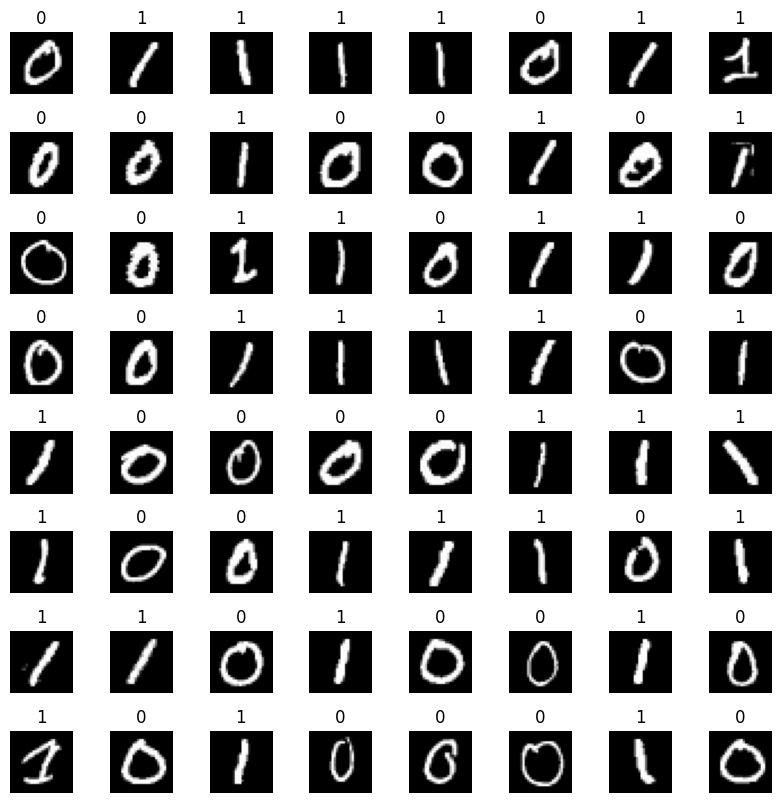

In [5]:
# Show first 100 training examples in a 10*10 subplot
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    X_random_reshaped = X_train[i].reshape((28,28))
    ax.imshow(X_random_reshaped, cmap='gray')
    ax.set_title(y_train[i,0])
    ax.set_axis_off()

In [6]:
# Pre-processing/normalizing of X_train & X_test between (0, 1)
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

In [7]:
#sequential model creation using dense layers 
model = Sequential(
    [
        tf.keras.layers.Dense(25, activation='relu', name="layer1"),
        tf.keras.layers.Dense(15, activation='relu', name="layer2"),
        tf.keras.layers.Dense(1, activation='sigmoid', name="layer3"),
    ], name = "recog_model",
)


In [8]:
#Fit model using BinaryCrossentropy loss function
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
)

#fit model using taining set and determine epoch
model.fit(
    X_train,y_train,
    epochs=20
)

Epoch 1/20
396/396 [==============================] - 2s 2ms/step - loss: 0.0229
Epoch 2/20
396/396 [==============================] - 1s 2ms/step - loss: 0.0039
Epoch 3/20
396/396 [==============================] - 1s 2ms/step - loss: 0.0030
Epoch 4/20
396/396 [==============================] - 1s 2ms/step - loss: 0.0021
Epoch 5/20
396/396 [==============================] - 1s 2ms/step - loss: 0.0019
Epoch 6/20
396/396 [==============================] - 1s 2ms/step - loss: 0.0013
Epoch 7/20
396/396 [==============================] - 1s 2ms/step - loss: 0.0016
Epoch 8/20
396/396 [==============================] - 1s 2ms/step - loss: 0.0011
Epoch 9/20
396/396 [==============================] - 1s 2ms/step - loss: 6.3055e-04
Epoch 10/20
396/396 [==============================] - 1s 2ms/step - loss: 7.4183e-04
Epoch 11/20
396/396 [==============================] - 1s 2ms/step - loss: 4.4419e-04
Epoch 12/20
396/396 [==============================] - 1s 2ms/step - loss: 4.3515e-04
Epoch 13/

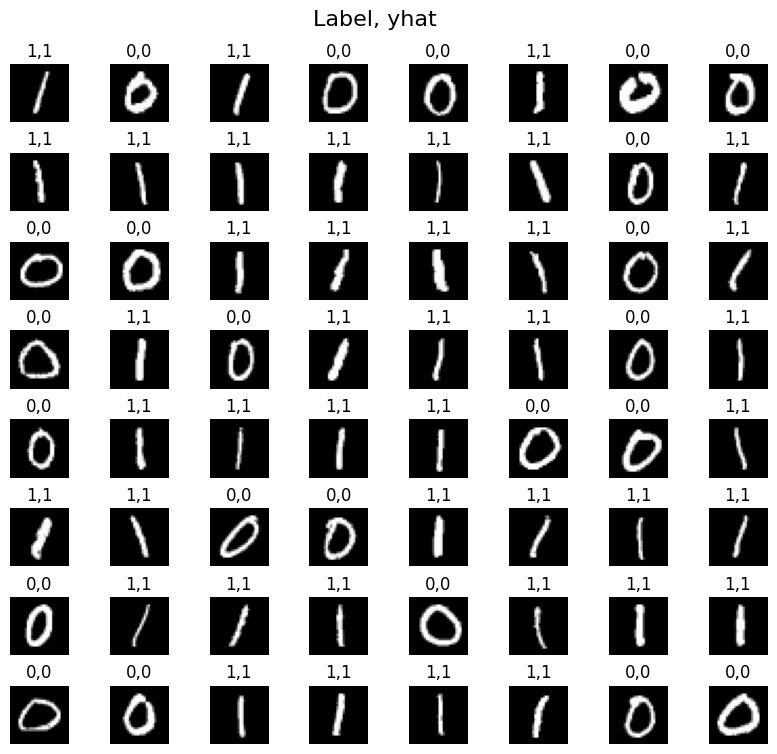

In [9]:
#Show first 100 testing examples with assigned labels and predicted labels
fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92])

for i,ax in enumerate(axes.flat):
    X_reshaped = X_test[i,].reshape((28, 28))
    ax.imshow(X_reshaped, cmap='gray')
    prediction = model.predict(X_test[i].reshape(1, 784))

    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
        
    ax.set_title(f"{y_test[i,0]},{yhat}")
    ax.set_axis_off()
    fig.suptitle("Label, yhat", fontsize=16)
plt.show()